In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# load review dataset
review = pd.read_csv('ALL_REVIEWS.csv', sep='|')

In [11]:
# load empathetic dataset
empathetic = pd.read_csv('emotion-emotion_69k.csv')

In [5]:
# get data summary
def get_summary(df):
    # get df dimension
    rows, col = df.shape
    print(f"Total Rows:{rows}, Total columns:{col}","\n")

    # Get first 5 rows
    print("Data Head", "\n")
    print(df.head(), "\n")

    # get last 5 rows
    print("Data Tail", "\n")
    print(df.tail(), "\n")

    # get dataframe Info
    print("Data Info", "\n")
    print(df.info())

In [6]:
get_summary(review)

Total Rows:449172, Total columns:7 

Data Head 

   Unnamed: 0 product_category star_rating  helpful_votes  total_votes  \
0           0          Apparel           1            0.0          0.0   
1           1          Apparel           1            3.0          5.0   
2           2          Apparel           1            1.0          1.0   
3           3          Apparel           1            0.0          0.0   
4           4          Apparel           1            0.0          0.0   

       review_headline                                        review_body  
0             One Star                                not exact in sizing  
1  Expensive Cinch Sak  I did not buy this jacket from Amazon. But it ...  
2         DISAPPOINTED  This product is a piece of s***. It doesn't lo...  
3          WRONG PLACE                         ITS THE PUERTO RICAN FLAG.  
4             One Star  it's not a dress but a top. cheap fabric, not ...   

Data Tail 

        Unnamed: 0 product_category 

In [7]:
get_summary(empathetic)

Total Rows:64636, Total columns:7 

Data Head 

   Unnamed: 0                                          Situation      emotion  \
0           0  I remember going to the fireworks with my best...  sentimental   
1           1  I remember going to the fireworks with my best...  sentimental   
2           2  I remember going to the fireworks with my best...  sentimental   
3           3  I remember going to the fireworks with my best...  sentimental   
4           4  I remember going to the fireworks with my best...  sentimental   

                                empathetic_dialogues  \
0  Customer :I remember going to see the firework...   
1  Customer :This was a best friend. I miss her.\...   
2              Customer :We no longer talk.\nAgent :   
3  Customer :Was this a friend you were in love w...   
4             Customer :Where has she gone?\nAgent :   

                                              labels Unnamed: 5 Unnamed: 6  
0  Was this a friend you were in love with, or ju..

Based on the summary above, we can see that there are null values in both datasets. In the review dataset, they appear in the helpful_votes, total_votes, review_headline, and review_body columns. In the empathetic dataset, null values are found in empathetic_dialogues, Unnamed: 5, and Unnamed: 6.

We can also see an unnecessary column in both datasets, which is the unnamed:0 column. This column will be dropped.

In [12]:
# drop unnecessary col from the review and empathetic dataset

col_to_drop = ['Unnamed: 0']

review = review.drop(columns=col_to_drop)
empathetic = empathetic.drop(columns=col_to_drop)

In [13]:
# check for null and duplicate value

def null_and_duplicates(df):
    # get null value for each column
    null_counts = df.isnull().sum()
    # Total number of null values in the DataFrame
    total_nulls = null_counts.sum()
    # Count the number of duplicate rows
    duplicate_rows = df.duplicated().sum()
    
    # store in a dictionary
    result = {
        "null_counts_per_column": null_counts,
        "total_nulls": total_nulls,
        "duplicate_rows": duplicate_rows
    }
    print(result)


In [14]:
null_and_duplicates(review)

{'null_counts_per_column': product_category      0
star_rating           0
helpful_votes       112
total_votes         112
review_headline     125
review_body         205
dtype: int64, 'total_nulls': 554, 'duplicate_rows': 12753}


In [15]:
null_and_duplicates(empathetic)

{'null_counts_per_column': Situation                   0
emotion                     4
empathetic_dialogues        0
labels                      0
Unnamed: 5              64523
Unnamed: 6              64631
dtype: int64, 'total_nulls': 129158, 'duplicate_rows': 8}


In [16]:
# drop null rows

review.dropna(inplace=True)
empathetic.dropna(inplace=True)

## TEXT COLUMN CLEANSING

In [79]:
# create a function to clean the text column
import re
import contractions #to expand contractions

def clean_text(text):
    text = contractions.fix(text)
    text = re.sub(r'<\s*br\s*/?\s*>', ' ', text, flags= re.IGNORECASE) #remove br new line
    text = re.sub(r'[^A-Za-z]', ' ', text) #keep alphanumeric character only by using re.sub
    token = text.split()
    token = [a for a in token if a.lower() not in stop_words]
    token = [a for a in token if len(a)>1] #keep only word with more than 1 character
    text_cleaned = ' '.join(token)
    text_cleaned = text_cleaned.lower() #lower our text
    return text_cleaned

In [80]:
# create new cleaned column
review['review_body_cleaned'] = review['review_body'].apply(clean_text)
review['review_headline_cleaned'] = review['review_headline'].apply(clean_text)

In [81]:
# create sentiment column based on rating
# 1-2 will be classified as negative
# 3 will be classified as neutral
# 4-5 will be classified as positive

col = review['star_rating']

conditions = [
    col.isin(['1','2']),
    col=='3',
    col.isin(['4','5'])
]

choices = ['negative', 'neutral', 'positive']

review['sentiment'] = np.select(conditions, choices, default='Unknown')

In [82]:
review.head()

,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_body_cleaned,review_headline_cleaned,review_headline_count,review_headline_cleaned_count,review_body_count,review_body_cleaned_count,sentiment
0,Apparel,1,0.0,0.0,One Star,not exact in sizing,exact sizing,one star,2,2,4,2,negative
1,Apparel,1,3.0,5.0,Expensive Cinch Sak,I did not buy this jacket from Amazon. But it ...,buy jacket amazon simply worst jacket ever bou...,expensive cinch sak,3,3,163,76,negative
2,Apparel,1,1.0,1.0,DISAPPOINTED,This product is a piece of s***. It doesn't lo...,product piece look anything like picture waste...,disappointed,1,1,38,14,negative
3,Apparel,1,0.0,0.0,WRONG PLACE,ITS THE PUERTO RICAN FLAG.,puerto rican flag,wrong place,2,2,5,3,negative
4,Apparel,1,0.0,0.0,One Star,"it's not a dress but a top. cheap fabric, not ...",dress top cheap fabric linen nothing see photo,one star,2,2,18,8,negative


In [83]:
# get unique value of product category

review['product_category'].unique()

array(['Apparel', 'Automotive', 'Baby', 'Beauty', 'Books', 'Camera',
       'Digital_Ebook_Purchase', 'Digital_Music_Purchase',
       'Digital_Software', 'Digital_Video_Download',
       'Digital_Video_Games', 'Electronics', 'Furniture', 'Gift Card',
       'Grocery', 'Health & Personal Care', 'Major Appliances',
       'Mobile_Apps', 'Mobile_Electronics', 'Musical Instruments',
       'Music', 'Office Products', 'Outdoors', 'PC',
       'Personal_Care_Appliances', 'Pet Products', 'Shoes', 'Software',
       'Sports', 'Tools', 'Toys', 'Video DVD', 'Video Games', 'Video',
       'Watches', 'Wireless'], dtype=object)

## WORD COUNT ANALYSIS

In [84]:
# function to count words
from collections import Counter

def word_count(text):
    word_counts = Counter(text.split())
    return sum(word_counts.values())

In [85]:
# col to count
col_to_count = ['review_headline','review_headline_cleaned','review_body','review_body_cleaned']

In [86]:
for col in col_to_count:
    review[f'{col}_count'] = review[col].apply(word_count)

In [87]:
# create a dict to store grouped data by product category

dict_data = {}

col_to_group = ['review_headline_count','review_headline_cleaned_count','review_body_count','review_body_cleaned_count']

for a in col_to_group:
    grouped = review.groupby('product_category')[a].describe()
    dict_data[a] = grouped

In [88]:
dict_data['review_body_cleaned_count'].sort_values(by=['mean','50%'], ascending=[False,False])

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
Books,12498.0,87.952152,107.573652,0.0,28.0,54.0,105.0,2228.0
Video,12499.0,39.773662,98.186993,0.0,5.0,12.0,31.0,2543.0
Digital_Ebook_Purchase,12493.0,38.514208,58.096368,4.0,13.0,19.0,39.0,976.0
Major Appliances,12497.0,34.043050,57.833095,0.0,6.0,16.0,40.0,1252.0
Digital_Software,12496.0,30.082827,59.272277,0.0,5.0,14.0,35.0,2361.0
Video DVD,12498.0,28.749800,70.096318,0.0,3.0,8.0,23.0,1776.0
Music,12498.0,28.644183,74.767109,0.0,3.0,8.0,22.0,1916.0
Software,12498.0,28.580653,71.980167,0.0,4.0,10.0,28.0,1821.0
Camera,12498.0,27.068971,51.701922,0.0,5.0,12.0,29.0,1635.0


The book category has the highest average review word count, which makes sense as book buyers are likely avid readers and tend to write more detailed reviews. This is followed by video and digital ebooks in the second and third place.

In [89]:
# we will try to build a function to build bar plot for the most occurvirences word

def popular_words(df, column, title, top_n=50):

    # word counter
    counts_word = Counter(
                words.lower()
                for a in df[column].dropna() if isinstance(a, str)
                for words in a.split()
    )

    # get top_n based on user input when calling the function
    top_words = counts_word.most_common(top_n)

    # save the top_words in a datframe
    df_top_words = pd.DataFrame(top_words, columns=["Word", "Count"])

    # zip keys, values from the top words to be used in the plot
    keys, values = zip(*top_words)

    # plot the data
    plt.figure(figsize=(8,6))
    plt.barh(keys, values)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

    # display the top_words dataframe to make it easier reading the data
    display(df_top_words)

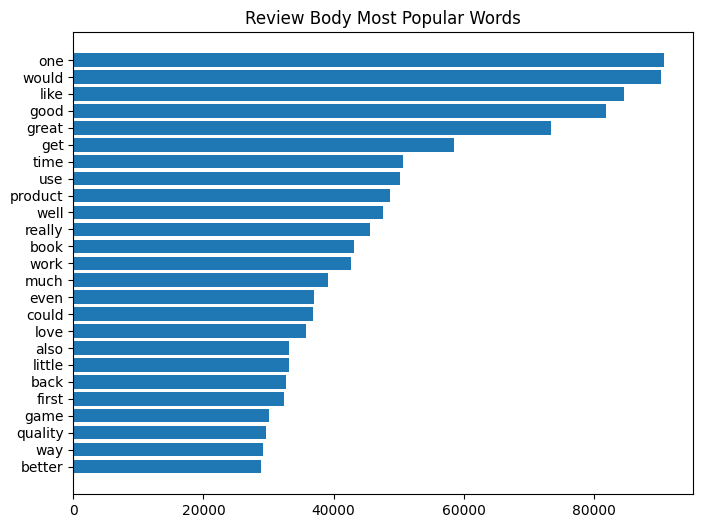

,Word,Count
0,one,90768
1,would,90375
2,like,84617
3,good,81809
4,great,73359
5,get,58469
6,time,50709
7,use,50234
8,product,48738
9,well,47669


In [90]:
popular_words(review, 'review_body_cleaned', 'Review Body Most Popular Words', top_n=25)

In [93]:
negative_review = review[review['sentiment']=='negative'].copy()

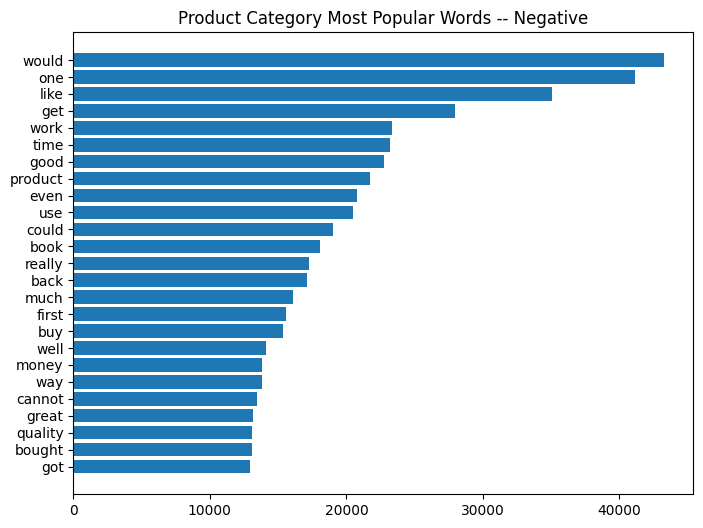

,Word,Count
0,would,43252
1,one,41162
2,like,35065
3,get,27975
4,work,23365
5,time,23170
6,good,22766
7,product,21758
8,even,20775
9,use,20456


In [94]:
popular_words(negative_review, 'review_body_cleaned', 'Product Category Most Popular Words -- Negative', top_n=25)

In [117]:
# get one specific category to see the most popular words

negative_review_baby = review[(review['product_category']=='Baby') & (review['sentiment']=='negative')].copy()

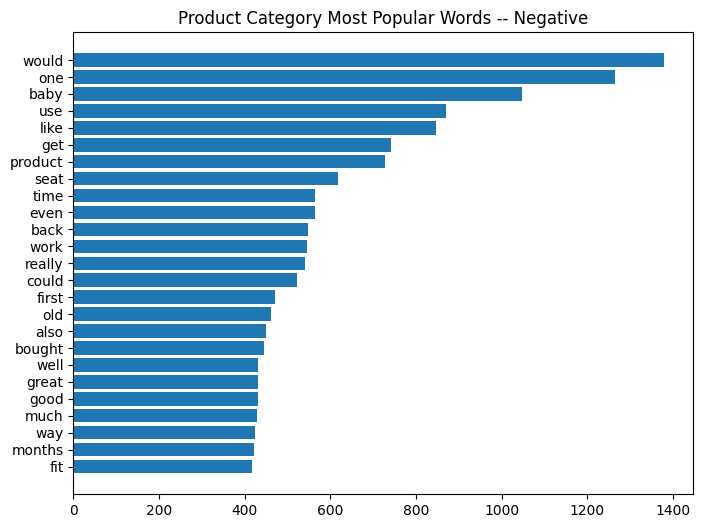

,Word,Count
0,would,1379
1,one,1265
2,baby,1048
3,use,870
4,like,846
5,get,741
6,product,728
7,seat,619
8,time,565
9,even,565


In [118]:
popular_words(negative_review_baby, 'review_body_cleaned', 'Product Category Most Popular Words -- Negative', top_n=25)

In [119]:
# get one specific category to see the most popular words

positive_review_baby = review[(review['product_category']=='Baby') & (review['sentiment']=='positive')].copy()

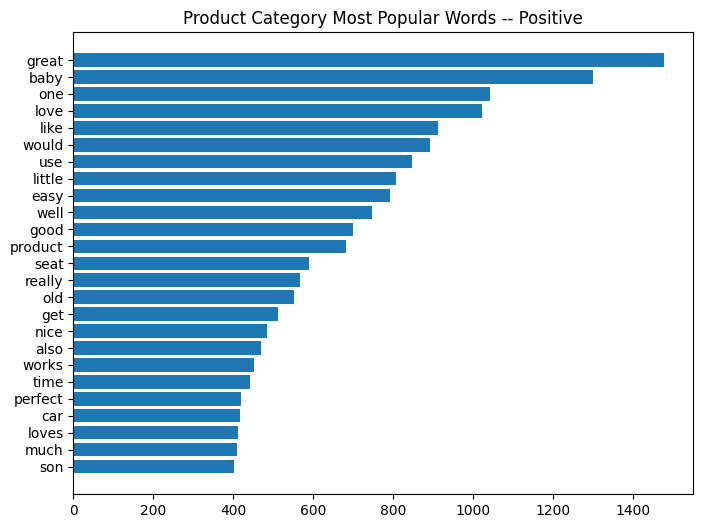

,Word,Count
0,great,1477
1,baby,1301
2,one,1041
3,love,1021
4,like,913
5,would,892
6,use,846
7,little,806
8,easy,791
9,well,746


In [120]:
popular_words(positive_review_baby, 'review_body_cleaned', 'Product Category Most Popular Words -- Positive', top_n=25)

In [121]:
# get one specific category to see the most popular words

neutral_review_baby = review[(review['product_category']=='Baby') & (review['sentiment']=='neutral')].copy()

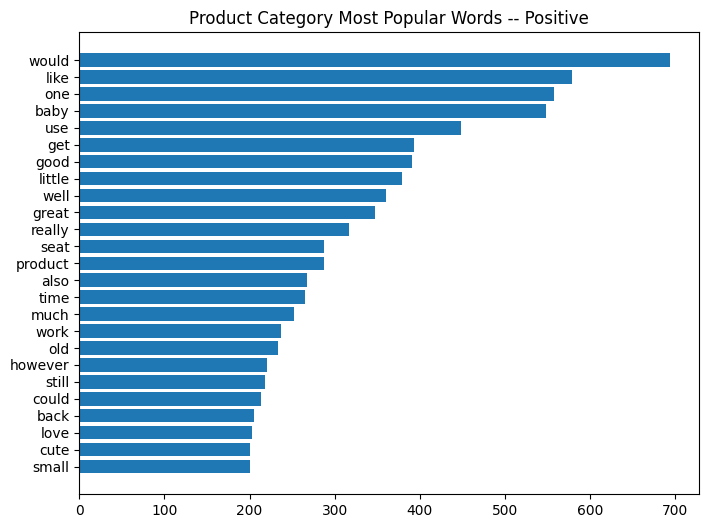

,Word,Count
0,would,694
1,like,579
2,one,558
3,baby,548
4,use,449
5,get,393
6,good,391
7,little,379
8,well,360
9,great,347


In [122]:
popular_words(neutral_review_baby, 'review_body_cleaned', 'Product Category Most Popular Words -- Positive', top_n=25)

## WORD ASSOCIATION AND COLLOCATION

In [107]:
import spacy
from nltk.collocations import *
spacy_model = spacy.load('en_core_web_sm')

In [108]:
# build a function to tokenize the text
def tokenize(data, column_name):
    text = ' '.join(data[column_name])
    doc = spacy_model(text)
    return [token.text for token in doc]

In [106]:
# Build a user define functio that will help in producing the association and collocation
def association_collocation(data, title, top_n=10, show='both'):
    
    # instantiate the bigram, tigram, and quadgram measures
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    trigram_measures = nltk.collocations.TrigramAssocMeasures()
    fourgram_measures = nltk.collocations.QuadgramAssocMeasures()
    
    # assign the collocation finder first
    finder_bigram = BigramCollocationFinder.from_words(data)
    finder_trigram = TrigramCollocationFinder.from_words(data)
    finder_fourgram = QuadgramCollocationFinder.from_words(data)

    # create an empty dictionary to store results
    results = {}

    # store the results from association and collocation
    results['association'] = {
            'bigrams': finder_bigram.nbest(bigram_measures.pmi, top_n),
            'trigrams': finder_trigram.nbest(trigram_measures.pmi, top_n),
            'fourgrams': finder_fourgram.nbest(fourgram_measures.pmi, top_n)
        }

    results['collocation'] = {
            'bigrams': finder_bigram.nbest(bigram_measures.likelihood_ratio, top_n),
            'trigrams': finder_trigram.nbest(trigram_measures.likelihood_ratio, top_n),
            'fourgrams': finder_fourgram.nbest(fourgram_measures.likelihood_ratio, top_n)
        }

    # print the results
    if show=='both':
        print("*"*75)
        print(f'Results for {title} Association using PMI Score')
        print("*"*75,'\n')
        print(f'Bigram Association {title}:\n', results['association']['bigrams'], '\n')
        print(f'Tigram Association {title}:\n', results['association']['trigrams'], '\n')
        print(f'fourgram Association {title}:\n', results['association']['fourgrams'], '\n')
        print("*"*75)
        print(f'Results for {title} Collocation using Likelihood Ratio')
        print("*"*75,'\n')
        print(f'Bigram Collocation {title}:\n', results['collocation']['bigrams'], '\n')
        print(f'Tigram Collocation {title}:\n', results['collocation']['trigrams'], '\n')
        print(f'fourgram Collocation {title}:\n', results['collocation']['fourgrams'], '\n')
    if show=='association':
        print("*"*75)
        print(f'Results for {title} Association using PMI Score')
        print("*"*75,'\n')
        print(f'Bigram Association {title}:\n', results['association']['bigrams'], '\n')
        print(f'Tigram Association {title}:\n', results['association']['trigrams'], '\n')
        print(f'fourgram Association {title}:\n', results['association']['fourgrams'], '\n')
    if show=='collocation':
        print("*"*75)
        print(f'Results for {title} Collocation using Likelihood Ratio')
        print("*"*75,'\n')
        print(f'Bigram Collocation {title}:\n', results['collocation']['bigrams'], '\n')
        print(f'Tigram Collocation {title}:\n', results['collocation']['trigrams'], '\n')
        print(f'fourgram Collocation {title}:\n', results['collocation']['fourgrams'], '\n')

In [114]:
# merge original text and cleaned text

review['headline_body'] = 'headline' + ':' + review['review_headline'] + ' ' + 'body' + ':' + review['review_body']
review['headline_body_cleaned'] = 'headline' + ':' + review['review_headline_cleaned'] + ' ' + 'body' + ':' + review['review_body_cleaned']

In [124]:
association_collocation(tokenize(negative_review_baby,'review_body_cleaned'), 'Negative Review Baby',
                        top_n=15)

***************************************************************************
Results for Negative Review Baby Association using PMI Score
*************************************************************************** 

Bigram Association Negative Review Baby:
 [('abrasive', 'cleaners'), ('acoustic', 'guitar'), ('acura', 'mdx'), ('adjusts', 'accordingly'), ('administer', 'motrin'), ('aesthetically', 'pleasing'), ('allen', 'wrench'), ('alleviate', 'runny'), ('allyoop', 'austinburn'), ('amazonians', 'contradicting'), ('amounts', 'medication'), ('apology', 'fellow'), ('artificially', 'welded'), ('ash', 'bury'), ('aspiration', 'phneumonia')] 

Tigram Association Negative Review Baby:
 [('alleviate', 'runny', 'noses'), ('apology', 'fellow', 'amazonians'), ('bare', 'bones', 'minimalist'), ('barneys', 'dissappointed', 'hugely'), ('brus', 'cagpspn', 'plab'), ('bubbie', 'phyllis', 'teaneck'), ('cagpspn', 'plab', 'eesource'), ('capla', 'df', 'trus'), ('carpal', 'tunnel', 'syndrome'), ('cc', 'chevrole

In [125]:
association_collocation(tokenize(positive_review_baby,'review_body_cleaned'), 'Positive Review Baby',
                        top_n=15)

***************************************************************************
Results for Positive Review Baby Association using PMI Score
*************************************************************************** 

Bigram Association Positive Review Baby:
 [('accuracy', 'consistent'), ('adorableness', 'wiping'), ('adoring', 'charts'), ('ae', 'bb'), ('afterall', 'respected'), ('aggressive', 'chewers'), ('ahhs', 'paraben'), ('aiden', 'anis'), ('airing', 'itwill'), ('alive', 'phewww'), ('allen', 'wrenches'), ('altima', 'camry'), ('altough', 'toybar'), ('andy', 'pandy'), ('answered', 'exchanges')] 

Tigram Association Positive Review Baby:
 [('adoring', 'charts', 'adorableness'), ('ae', 'bb', 'bae'), ('altima', 'camry', 'equinox'), ('army', 'soldier', 'camo'), ('benz', 'gla', 'definitley'), ('billion', 'gnats', 'noseeums'), ('carpal', 'tunnel', 'surgery'), ('charts', 'adorableness', 'wiping'), ('cheek', 'illiciting', 'rooting'), ('cr', 'ryp', 'prd'), ('decyl', 'glucoside', 'sodium'), ('den

In [126]:
association_collocation(tokenize(neutral_review_baby,'review_body_cleaned'), 'Neutral Review Baby',
                        top_n=15)

***************************************************************************
Results for Neutral Review Baby Association using PMI Score
*************************************************************************** 

Bigram Association Neutral Review Baby:
 [('adhd', 'spd'), ('adjusters', 'rotates'), ('affected', 'papi'), ('afg', 'jordana'), ('agony', 'incoming'), ('ahold', 'maker'), ('alleviate', 'agony'), ('alpha', 'elite'), ('ancient', 'powers'), ('andersen', 'series'), ('annoyingly', 'untidy'), ('anxiety', 'autism'), ('apartment', 'building'), ('approx', 'january'), ('arcing', 'erect')] 

Tigram Association Neutral Review Baby:
 [('adhd', 'spd', 'anxiety'), ('alleviate', 'agony', 'incoming'), ('attributed', 'hypo', 'allergenic'), ('boot', 'esp', 'sedan'), ('bruce', 'lee', 'kung'), ('butter', 'salad', 'dressing'), ('dangled', 'annoyingly', 'untidy'), ('eddie', 'bauer', 'langley'), ('fab', 'bb', 'ec'), ('fitin', 'jetta', 'sportwagen'), ('gerber', 'graduate', 'dippy'), ('intellectual', '

In [129]:
# export the data for fine tuning model

original_data = review[['headline_body', 'sentiment']].copy()
cleaned_data = review[['headline_body_cleaned', 'sentiment']].copy()

In [ ]:
original_data.to_csv('data_ori.csv', sep='|')